In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/svm-classification/UniversalBank.csv
/kaggle/input/svm-classification/Activity Sheet.docx
/kaggle/input/svm-classification/SVM_Classification.R


# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Importing Data

In [3]:
data = pd.read_csv('../input/svm-classification/UniversalBank.csv')

In [4]:
data.shape

(5000, 14)

In [5]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
X = data.drop('Personal Loan', axis = 1)
y = data['Personal Loan']
print("Shape of X is", X.shape)
print("Shape of y is", y.shape)

Shape of X is (5000, 13)
Shape of y is (5000,)


# Preprocessing

In [10]:
X = X.drop('ID', axis = 1)

In [11]:
X['ZIP Code'].nunique()

467

No use in keeping Zip Code with 467 unique values. We need to drop it

In [12]:
X = X.drop('ZIP Code', axis = 1)

In [13]:
X.shape

(5000, 11)

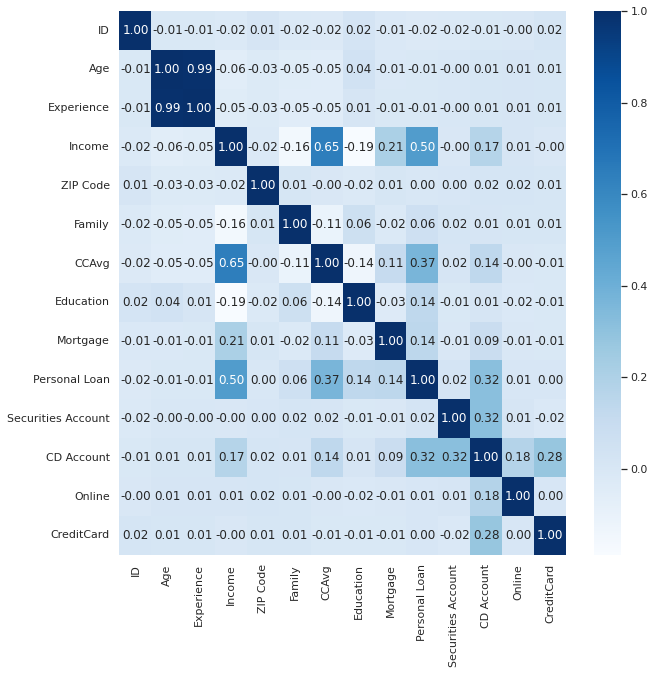

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cmap = 'Blues', annot = True, fmt = '.2f')
plt.show()

* CD Account, Mortgage, Education, CCAvg, Income - Important Classifiers
* Age and Experience are almost the same, can remove 1 

In [15]:
X = X.drop('Experience', axis = 1)

# Visualization

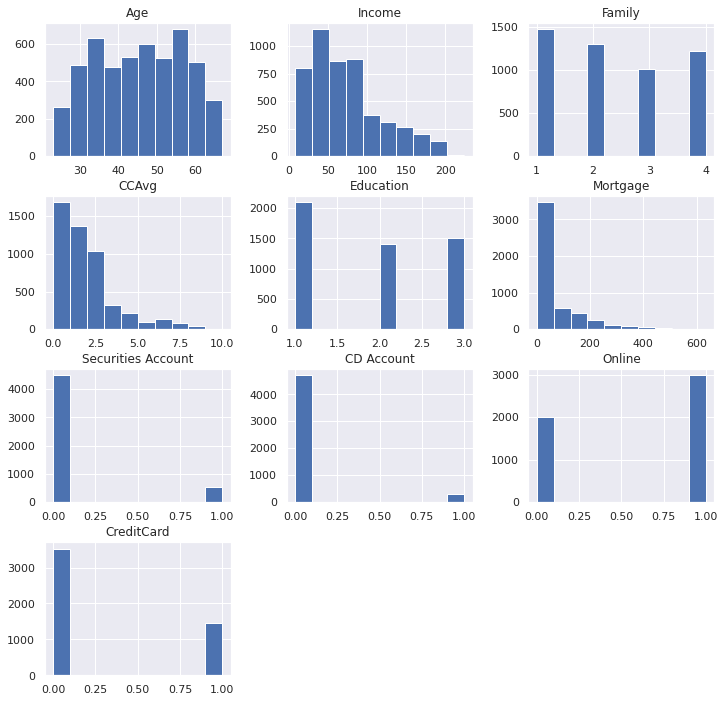

In [16]:
# plt.figure(figsize=(12,12))
X.hist(figsize=(12,12))
plt.show()

# Splitting Test and Train data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("Shape of X_train is", X_train.shape)
print("Shape of X_test is", X_test.shape)
print("Shape of y_train is", y_train.shape)
print("Shape of y_test is", y_test.shape)

Shape of X_train is (4000, 10)
Shape of X_test is (1000, 10)
Shape of y_train is (4000,)
Shape of y_test is (1000,)


# SVM Classification without Scaled Data

In [18]:
lin_svc_without_scaling = LinearSVC(C = 1, loss = "hinge", random_state = 42)
lin_svc_without_scaling.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1, loss='hinge', random_state=42)

## Calculating Error On Training Data 

In [19]:
y_pred = lin_svc_without_scaling.predict(X_train)
score1 = accuracy_score(y_train, y_pred)
print("Accuracy Score on Training Data for Linear SVC without scaling -", score1)

Accuracy Score on Training Data for Linear SVC without scaling - 0.85625


## Calculating Error On Testing Data 

In [20]:
y_pred_test = lin_svc_without_scaling.predict(X_test)
score2 = accuracy_score(y_test, y_pred_test)
print("Accuracy Score on Training Data for Linear SVC without scaling -", score2)

Accuracy Score on Training Data for Linear SVC without scaling - 0.869


# SVM Classification on Scaled Data

## Scaling Data

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
lin_svc_with_scaling = LinearSVC(C = 1, loss = "hinge", random_state = 42)
lin_svc_with_scaling.fit(X_train_scaled, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1, loss='hinge', random_state=42)

## Calculating Error On Training Data 

In [23]:
y_pred = lin_svc_with_scaling.predict(X_train_scaled)
score3 = accuracy_score(y_train, y_pred)
print("Accuracy Score on Training Data for Linear SVC after scaling -", score3)

Accuracy Score on Training Data for Linear SVC after scaling - 0.953


In [24]:
diff = ((score3 - score1)/score1) * 100
print("Increase in Accuracy Score on Training Data After Scaling-", diff.round(2), "%")

Increase in Accuracy Score on Training Data After Scaling- 11.3 %


## Calculating Error On Testing Data 

In [25]:
y_pred_test = lin_svc_with_scaling.predict(X_test_scaled)
score4 = accuracy_score(y_test, y_pred_test)
print("Accuracy Score on Training Data for Linear SVC without scaling -", score4)

Accuracy Score on Training Data for Linear SVC without scaling - 0.952


In [26]:
diff = ((score4 - score2)/score2) * 100
print("Increase in Accuracy Score on Training Data After Scaling-", diff.round(2), "%")

Increase in Accuracy Score on Training Data After Scaling- 9.55 %


# LinearSVC vs SVC(kernel = "linear")

In [27]:
svc_lin_kernel = SVC(C = 1, coef0 = 1,random_state = 42)
svc_lin_kernel.fit(X_train_scaled, y_train)

SVC(C=1, coef0=1, random_state=42)

## Calculating Error On Training Data 

In [28]:
y_pred = svc_lin_kernel.predict(X_train_scaled)
score5 = accuracy_score(y_train, y_pred)
print("Accuracy Score on Training Data for Linear SVC after scaling -", score5)

Accuracy Score on Training Data for Linear SVC after scaling - 0.98175


## Calculating Error On Testing Data 

In [29]:
y_pred_test = svc_lin_kernel.predict(X_test_scaled)
score6 = accuracy_score(y_test, y_pred_test)
print("Accuracy Score on Training Data for Linear SVC after scaling -", score6)

Accuracy Score on Training Data for Linear SVC after scaling - 0.978


In [30]:
diff = ((score5 - score3)/score3) * 100
print("Increase in Accuracy Score on Training Data Between LinearSVC and SVC(linear)-", diff.round(2), "%")

Increase in Accuracy Score on Training Data Between LinearSVC and SVC(linear)- 3.02 %


In [31]:
diff = ((score6 - score4)/score4) * 100
print("Increase in Accuracy Score on Testing Data Between LinearSVC and SVC(linear)-", diff.round(2), "%")

Increase in Accuracy Score on Testing Data Between LinearSVC and SVC(linear)- 2.73 %


# Grid Search for finding best estimators

In [32]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'linear']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.906, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.906, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.906, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.906, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.906, total=   0.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.950, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.955, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.954, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.944, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  4.9min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [33]:
print(grid.best_params_)

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}


In [34]:
print(grid.best_estimator_)

SVC(C=1000, gamma=0.01)


In [35]:
grid_predictions = grid.best_estimator_.predict(X_test_scaled)
score7 = accuracy_score(y_true=y_test, y_pred=grid_predictions)
print("Accuracy Score on Training Data for best estimator SVC without gridSearch -", score7)

Accuracy Score on Training Data for best estimator SVC without gridSearch - 0.987
